In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [3]:
data = pd.read_csv(r"C:\Users\sampada\OneDrive\Desktop\Mall_Customers.csv")
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
data.shape

(200, 5)

In [5]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
data.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [7]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [8]:
data.drop(["CustomerID"],axis=1 , inplace = True)

In [9]:
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


C:\Users\sampada\AppData\Local\Temp\ipykernel_16008\1381762856.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[x], bins=20)
C:\Users\sampada\AppData\Local\Temp\ipykernel_16008\1381762856.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[x], bins=20)
C:\Users\sampada\AppData\Local

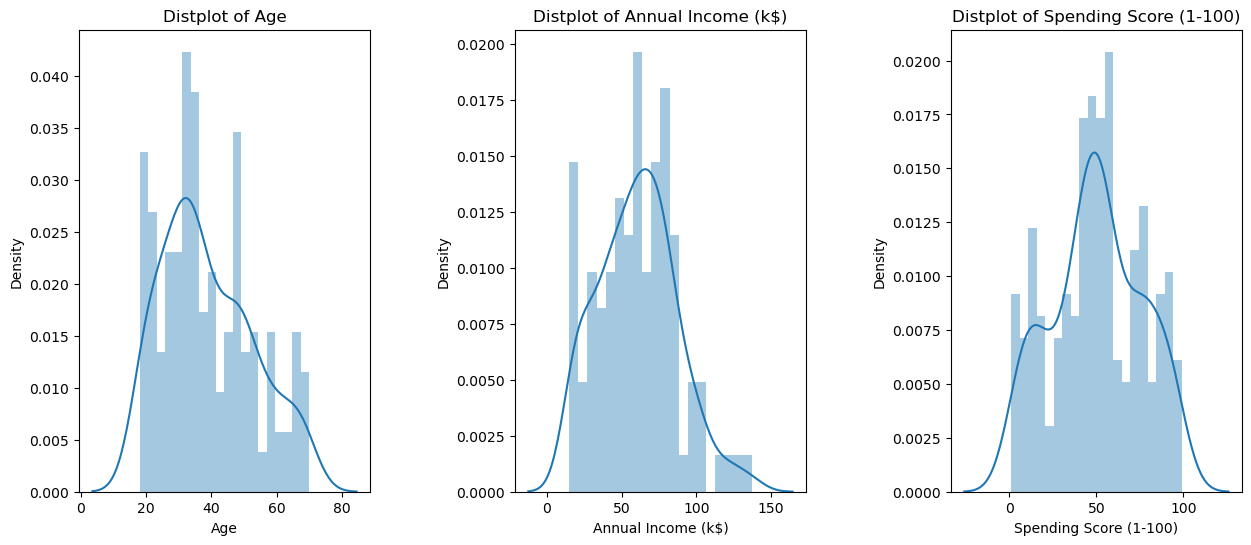

In [10]:
plt.figure(1, figsize=(15, 6))
n = 0

for x in ["Age", "Annual Income (k$)", "Spending Score (1-100)"]:
    n += 1
    plt.subplot(1, 3, n)
    plt.subplots_adjust(hspace = 0.5 , wspace =0.5)
    sns.distplot(data[x], bins=20)
    plt.title('Distplot of {}'.format(x))

plt.show()

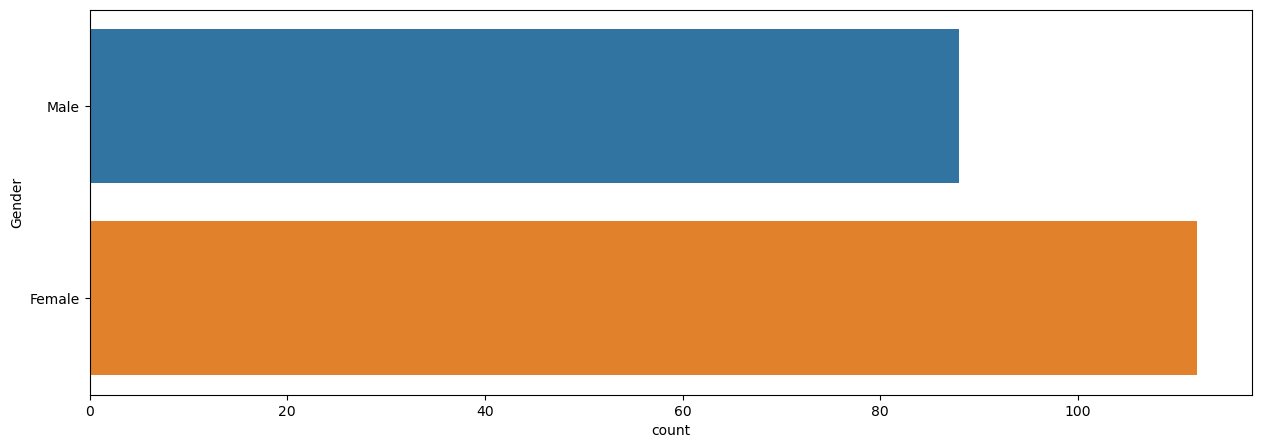

In [11]:
plt.figure(figsize=(15,5))
sns.countplot(y='Gender' ,data = data)
plt.show()

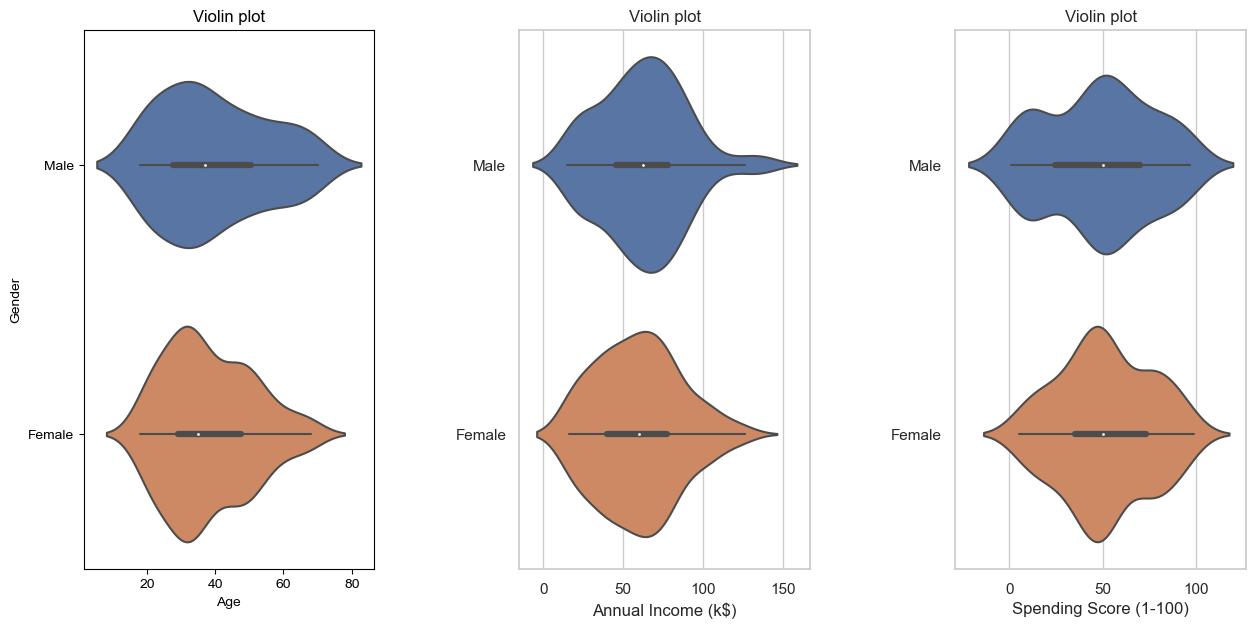

In [12]:
plt.figure(1, figsize=(15, 7))
n = 0

for cols in ["Age", "Annual Income (k$)", "Spending Score (1-100)"]:
    n += 1
    plt.subplot(1, 3, n)
    sns.set(style="whitegrid")
    plt.subplots_adjust(hspace = 0.5 , wspace =0.5)
    sns.violinplot(x= cols , y= 'Gender', data = data)
    plt.ylabel('Gender' if n==1 else '')
    plt.title('Violin plot')

plt.show()

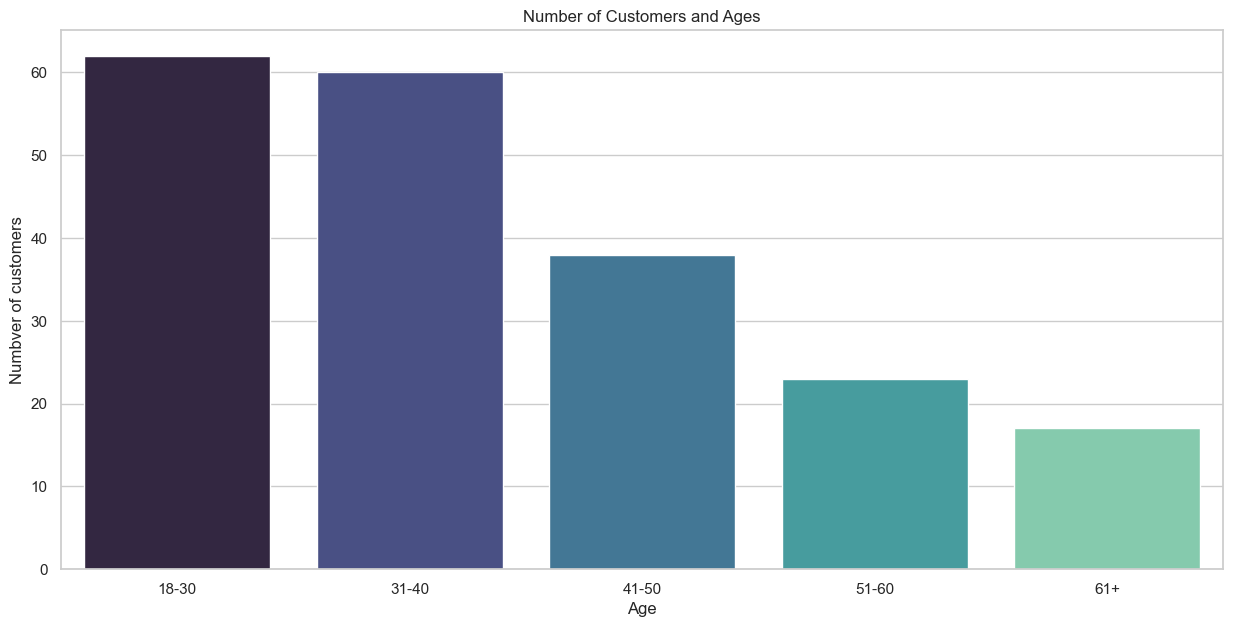

In [13]:
age_18_30 = data.Age[(data.Age>= 18) & (data.Age<=30)]
age_31_40 = data.Age[(data.Age>= 31) & (data.Age<=40)]
age_41_50 = data.Age[(data.Age>= 41) & (data.Age<=50)]
age_51_60 = data.Age[(data.Age>= 51) & (data.Age<=60)]
age_61above = data.Age[(data.Age >=61)]

agex=["18-30" , "31-40","41-50","51-60", "61+"]
agey=[len(age_18_30.values),len(age_31_40.values),len(age_41_50.values),len(age_51_60.values),len(age_61above.values)]

plt.figure(figsize=(15,7))
sns.barplot(x=agex,y=agey,palette ="mako")
plt.title("Number of Customers and Ages")
plt.xlabel("Age")
plt.ylabel("Numbver of customers")
plt.show()

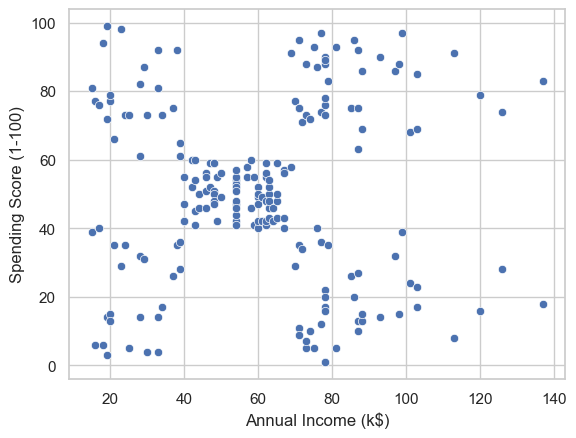

In [14]:
sns.scatterplot(x="Annual Income (k$)", y="Spending Score (1-100)", data=data)

plt.show()

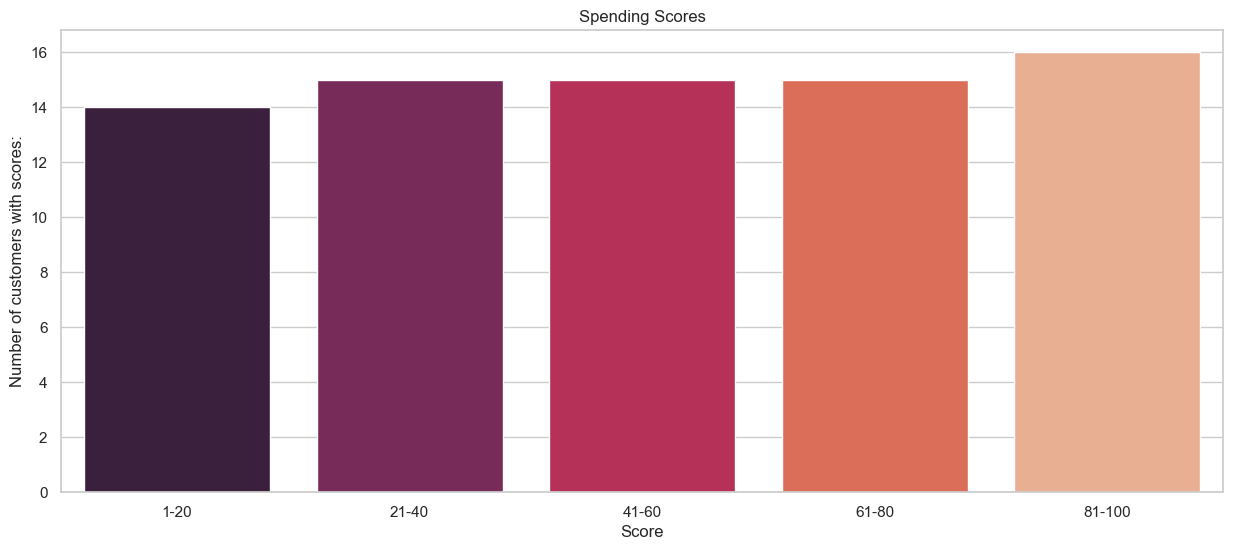

In [15]:
ss_1_20 = data["Spending Score (1-100)"][(data["Spending Score (1-100)"] >= 1) & (data["Spending Score (1-100)"] <= 20)]
ss_21_40 = data["Spending Score (1-100)"][(data["Spending Score (1-100)"] >= 21) & (data["Spending Score (1-100)"] <= 40)]
ss_41_60 = data["Spending Score (1-100)"][(data["Spending Score (1-100)"] >= 41) & (data["Spending Score (1-100)"] <= 60)]
ss_61_80 = data["Spending Score (1-100)"][(data["Spending Score (1-100)"] >= 61) & (data["Spending Score (1-100)"] <= 80)]
ss_61_80 = data["Spending Score (1-100)"][(data["Spending Score (1-100)"] >= 81) & (data["Spending Score (1-100)"] <= 100)]
ssx =["1-20", "21-40", "41-60", "61-80", "81-100"]
ssy = [len("ss_1_20.values"), len("ss_21_40.values"),len("ss_41_60.values"),len("ss_61_80.values"), len("ss_81_100.values")]

plt.figure(figsize=(15,6))
sns.barplot(x=ssx , y=ssy , palette = "rocket")
plt.title("Spending Scores")
plt.xlabel("Score")
plt.ylabel("Number of customers with scores:")
plt.show()



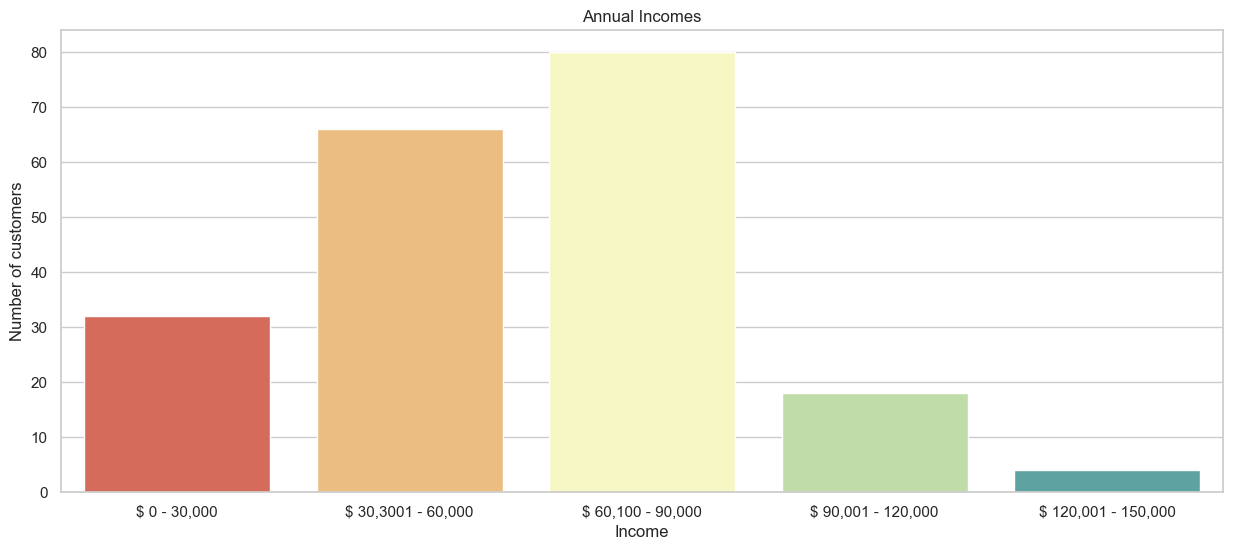

In [16]:
ai1= data["Annual Income (k$)"][(data['Annual Income (k$)']>=0) &(data['Annual Income (k$)']<=30)] 
ai2= data["Annual Income (k$)"][(data['Annual Income (k$)']>=31) & (data['Annual Income (k$)']<=60)] 
ai3= data["Annual Income (k$)"][(data['Annual Income (k$)']>=61) & (data['Annual Income (k$)']<=90)] 
ai4= data["Annual Income (k$)"][(data['Annual Income (k$)']>=91) & (data['Annual Income (k$)']<=120)] 
ai5= data["Annual Income (k$)"][(data['Annual Income (k$)']>=121) & (data['Annual Income (k$)']<=150)] 

aix = [ "$ 0 - 30,000", "$ 30,3001 - 60,000", "$ 60,100 - 90,000", "$ 90,001 - 120,000", "$ 120,001 - 150,000"]
aiy = [ len(ai1.values),len(ai2.values),len(ai3.values),len(ai4.values),len(ai5.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=aix , y=aiy , palette = "Spectral")
plt.title("Annual Incomes")
plt.xlabel("Income")
plt.ylabel("Number of customers")
plt.show()



C:\Users\sampada\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\sampada\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\sampada\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\sampada\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when t

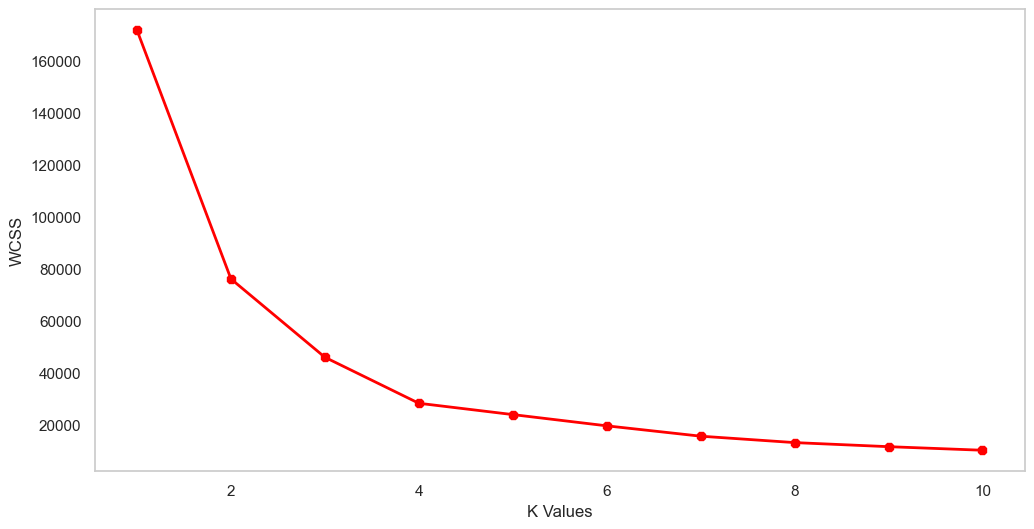

In [17]:
X1 = data.loc[:, ["Age","Spending Score (1-100)"]].values

wcss = []

for k in range (1,11):
    kmeans = KMeans(n_clusters = k, init= "k-means++")
    kmeans.fit(X1)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color = "red", marker ="8")
plt.xlabel("K Values")
plt.ylabel("WCSS")
plt.show()


In [18]:
kmeans = KMeans(n_clusters = 4)

label = kmeans.fit_predict(X1)

print(label)

C:\Users\sampada\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\sampada\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[3 1 2 1 3 1 2 1 2 1 2 1 2 1 2 1 3 3 2 1 3 1 2 1 2 1 2 3 2 1 2 1 2 1 2 1 2
 1 2 1 0 1 0 3 2 3 0 3 3 3 0 3 3 0 0 0 0 0 3 0 0 3 0 0 0 3 0 0 3 3 0 0 0 0
 0 3 0 3 3 0 0 3 0 0 3 0 0 3 3 0 0 3 0 3 3 3 0 3 0 3 3 0 0 3 0 3 0 0 0 0 0
 3 3 3 3 3 0 0 0 0 3 3 3 1 3 1 0 1 2 1 2 1 3 1 2 1 2 1 2 1 2 1 3 1 2 1 0 1
 2 1 2 1 2 1 2 1 2 1 2 1 0 1 2 1 2 1 2 1 2 3 2 1 2 1 2 1 2 1 2 1 2 1 2 1 3
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]


In [19]:
print(kmeans.cluster_centers_)

[[55.70833333 48.22916667]
 [30.1754386  82.35087719]
 [43.29166667 15.02083333]
 [27.61702128 49.14893617]]


C:\Users\sampada\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\sampada\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[1 3 2 3 1 3 2 3 2 3 2 3 2 3 2 3 1 1 2 3 1 3 2 3 2 3 2 1 2 3 2 3 2 3 2 3 2
 3 2 3 0 3 0 1 2 1 0 1 1 1 0 1 1 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0
 0 1 0 1 1 0 0 1 0 0 1 0 0 1 1 0 0 1 0 1 1 1 0 1 0 1 1 0 0 1 0 1 0 0 0 0 0
 1 1 1 1 1 0 0 0 0 1 1 1 3 1 3 0 3 2 3 2 3 1 3 2 3 2 3 2 3 2 3 1 3 2 3 0 3
 2 3 2 3 2 3 2 3 2 3 2 3 0 3 2 3 2 3 2 3 2 1 2 3 2 3 2 3 2 3 2 3 2 3 2 3 1
 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3]


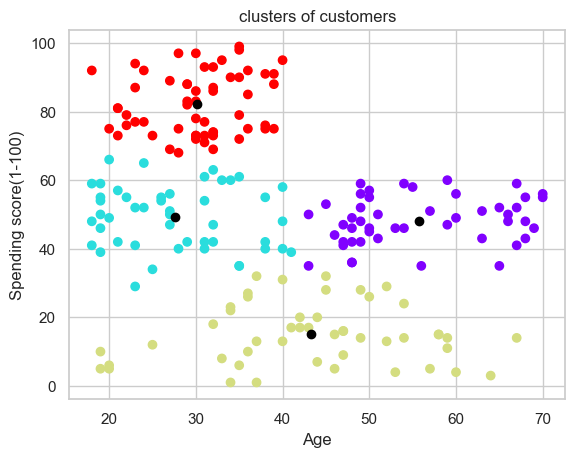

In [20]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(X1)


labels = kmeans.predict(X1)

print(labels)
plt.scatter(X1[:,0],X1[:,1], c=kmeans.labels_, cmap="rainbow")
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color ="black")
plt.title("clusters of customers")
plt.xlabel("Age")
plt.ylabel("Spending score(1-100)")
plt.show()


C:\Users\sampada\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\sampada\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\sampada\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\sampada\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when t

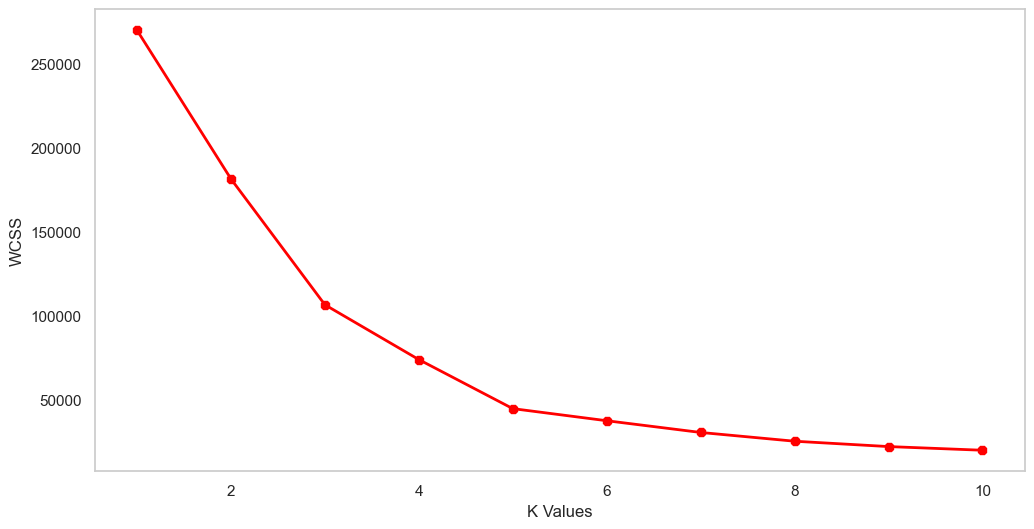

In [21]:
X2 = data.loc[:, ["Annual Income (k$)","Spending Score (1-100)"]].values

wcss = []

for k in range (1,11):
    kmeans = KMeans(n_clusters = k, init= "k-means++")
    kmeans.fit(X2)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color = "red", marker ="8")
plt.xlabel("K Values")
plt.ylabel("WCSS")
plt.show()


C:\Users\sampada\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\sampada\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]
[[87.         18.63157895]
 [48.26       56.48      ]
 [86.53846154 82.12820513]
 [26.30434783 20.91304348]]


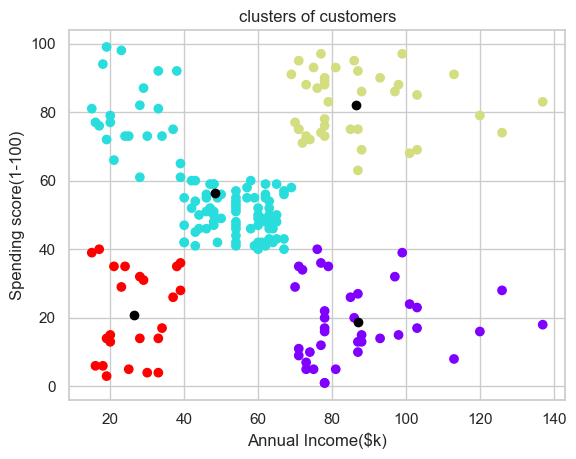

In [22]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(X2)


labels = kmeans.predict(X2)

print(labels)
print(kmeans.cluster_centers_)
plt.scatter(X2[:,0],X2[:,1], c=kmeans.labels_, cmap="rainbow")
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color ="black")
plt.title("clusters of customers")
plt.xlabel("Annual Income($k)")
plt.ylabel("Spending score(1-100)")
plt.show()

C:\Users\sampada\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\sampada\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\sampada\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\sampada\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when t

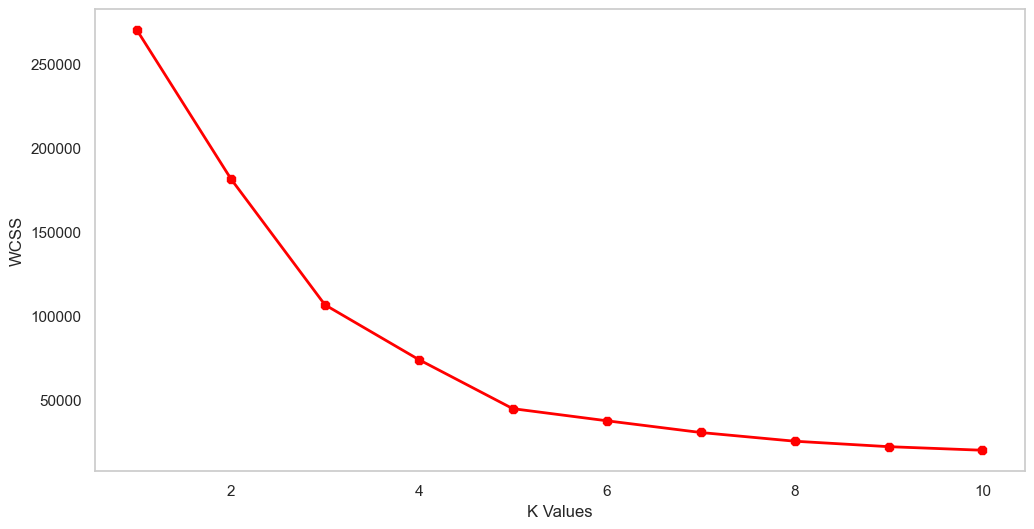

In [25]:
X3 = data.loc[:,:]

wcss = []

for k in range (1,11):
    kmeans = KMeans(n_clusters = k, init= "k-means++")
    kmeans.fit(X2)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color = "red", marker ="8")
plt.xlabel("K Values")
plt.ylabel("WCSS")
plt.show()


In [28]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
data['Gender'] = encoder.fit_transform(data['Gender'])
kmeans = KMeans(n_clusters = 5)

label = kmeans.fit_predict(X3)

print(label)

C:\Users\sampada\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\sampada\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2
 3 2 3 2 3 2 3 2 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 4 0 1 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 1 0 4 0 4 0
 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4
 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0]


In [29]:
print(kmeans.cluster_centers_)

[[ 0.46153846 32.69230769 86.53846154 82.12820513]
 [ 0.41772152 43.08860759 55.29113924 49.56962025]
 [ 0.39130435 45.2173913  26.30434783 20.91304348]
 [ 0.39130435 25.52173913 26.30434783 78.56521739]
 [ 0.52777778 40.66666667 87.75       17.58333333]]


C:\Users\sampada\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\sampada\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


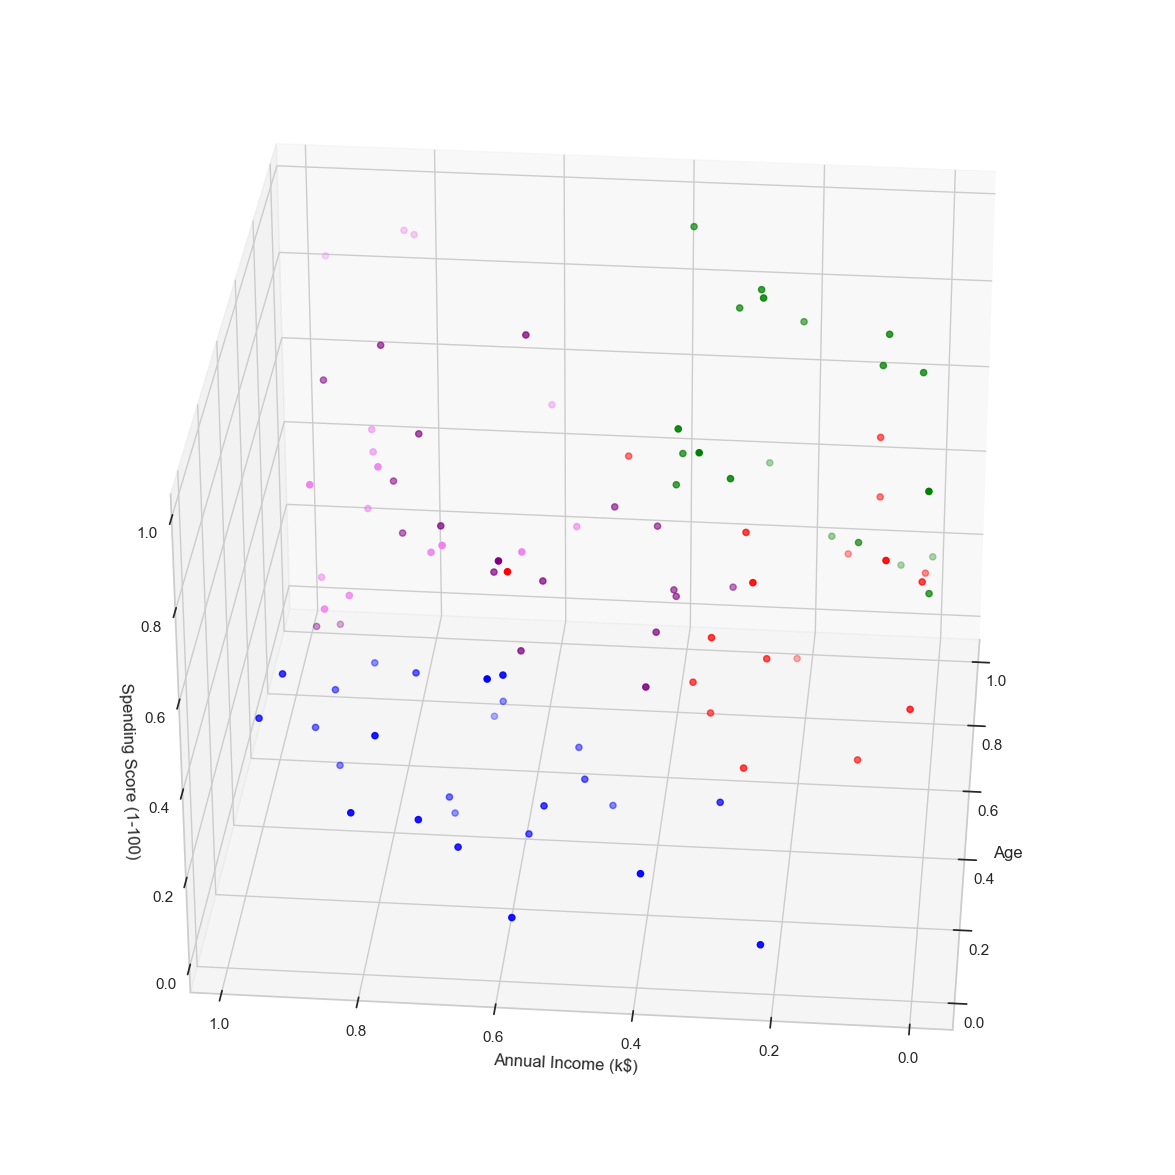

In [39]:

X = np.random.rand(100, 3)

kmeans = KMeans(n_clusters=5)
clusters = kmeans.fit_predict(X)

data = pd.DataFrame(X, columns=["X1", "X2", "X3"])
data["label"] = clusters

fig = plt.figure(figsize=(25,15))
ax= fig.add_subplot(111, projection='3d')
  
ax.scatter(data["X1"][data.label==0], data["X2"][data.label==0], data["X3"][data.label ==0], c='blue')
ax.scatter(data["X1"][data.label==1], data["X2"][data.label==1], data["X3"][data.label ==1], c='red')
ax.scatter(data["X1"][data.label==2], data["X2"][data.label==2], data["X3"][data.label ==2], c='violet')
ax.scatter(data["X1"][data.label==3], data["X2"][data.label==3], data["X3"][data.label ==3], c='purple')
ax.scatter(data["X1"][data.label==4], data["X2"][data.label==4], data["X3"][data.label ==4], c='green')
ax.view_init(30,185)

plt.xlabel("Age")
plt.ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')

plt.show()